In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
dataset_path = r"C:\Users\91832\Downloads\internet firewall.csv"
data = pd.read_csv(dataset_path)
data.head()
# Separate features (X) and labels (y)
X = data.drop('Action', axis=1)
y = data['Action']
data.head(5)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


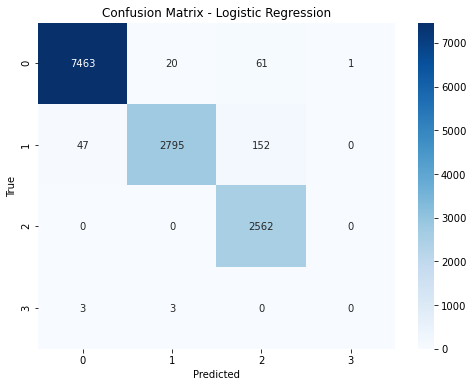

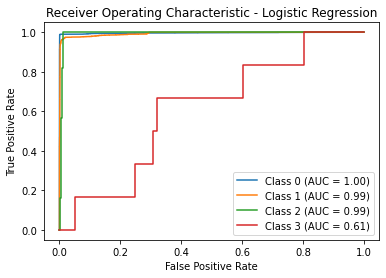

Logistic Regression Accuracy: 0.9781033035782406
Logistic Regression Confusion Matrix:
[[7463   20   61    1]
 [  47 2795  152    0]
 [   0    0 2562    0]
 [   3    3    0    0]]


In [10]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import label_binarize

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

lr_probabilities = lr_model.predict_proba(X_test)

# Convert the labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
lr_fpr = dict()
lr_tpr = dict()
lr_roc_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    lr_roc_auc[i] = roc_auc_score(y_test_bin[:, i], lr_probabilities[:, i])

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label='Class %d (AUC = %0.2f)' % (i, lr_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(lr_confusion_matrix)


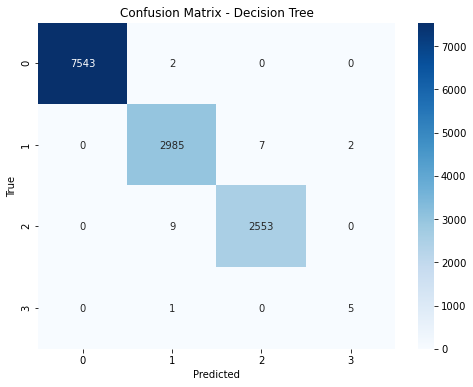

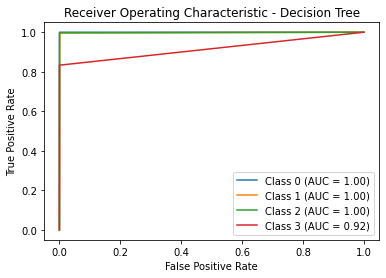

Decision Tree Accuracy: 0.9983978027008469
Decision Tree Confusion Matrix:
[[7543    2    0    0]
 [   0 2985    7    2]
 [   0    9 2553    0]
 [   0    1    0    5]]


In [8]:
from sklearn.preprocessing import label_binarize

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
import seaborn as sns



# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dt_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



dt_probabilities = dt_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
dt_fpr = dict()
dt_tpr = dict()
dt_roc_auc = dict()
for i in range(n_classes):
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test_bin[:, i], dt_probabilities[:, i])
    dt_roc_auc[i] = roc_auc_score(y_test_bin[:, i], dt_probabilities[:, i])

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(dt_fpr[i], dt_tpr[i], label='Class %d (AUC = %0.2f)' % (i, dt_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.legend(loc='lower right')
plt.show()

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)


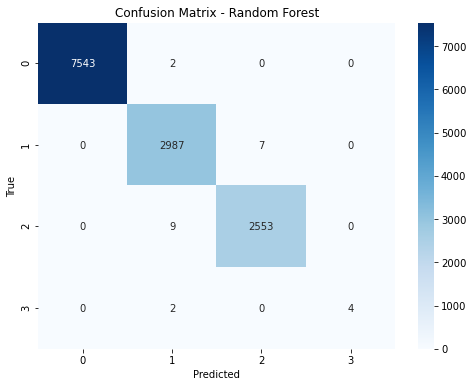

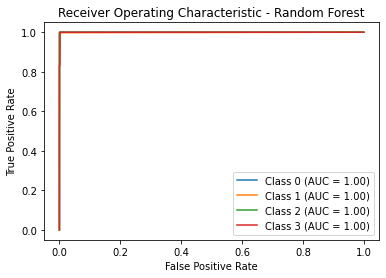

Random Forest Accuracy: 0.9984740978103304
Random Forest Confusion Matrix:
[[7543    2    0    0]
 [   0 2987    7    0]
 [   0    9 2553    0]
 [   0    2    0    4]]
Random Forest Average ROC AUC: 0.9995390079321854


In [11]:
from sklearn.preprocessing import label_binarize

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_probabilities = rf_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
rf_fpr = dict()
rf_tpr = dict()
rf_roc_auc = dict()
for i in range(n_classes):
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    rf_roc_auc[i] = roc_auc_score(y_test_bin[:, i], rf_probabilities[:, i])

# Compute average ROC AUC
rf_roc_auc_avg = np.mean(list(rf_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(rf_fpr[i], rf_tpr[i], label='Class %d (AUC = %0.2f)' % (i, rf_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Average ROC AUC:", rf_roc_auc_avg)


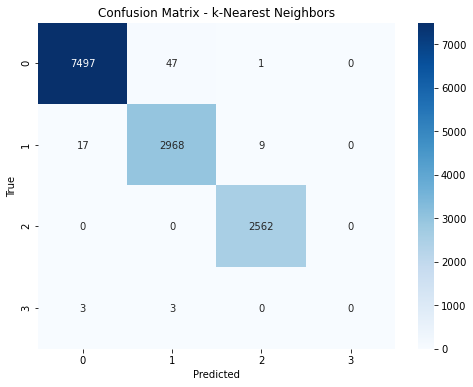

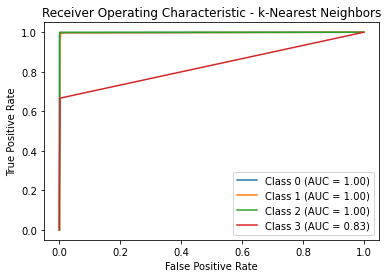

k-Nearest Neighbors Accuracy: 0.9938963912413215
k-Nearest Neighbors Confusion Matrix:
[[7497   47    1    0]
 [  17 2968    9    0]
 [   0    0 2562    0]
 [   3    3    0    0]]
k-Nearest Neighbors Average ROC AUC: 0.9569321619058504


In [12]:
from sklearn.preprocessing import label_binarize

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)

import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()

knn_probabilities = knn_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
knn_fpr = dict()
knn_tpr = dict()
knn_roc_auc = dict()
for i in range(n_classes):
    knn_fpr[i], knn_tpr[i], _ = roc_curve(y_test_bin[:, i], knn_probabilities[:, i])
    knn_roc_auc[i] = roc_auc_score(y_test_bin[:, i], knn_probabilities[:, i])

# Compute average ROC AUC
knn_roc_auc_avg = np.mean(list(knn_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(knn_fpr[i], knn_tpr[i], label='Class %d (AUC = %0.2f)' % (i, knn_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - k-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()

print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("k-Nearest Neighbors Confusion Matrix:")
print(knn_confusion_matrix)
print("k-Nearest Neighbors Average ROC AUC:", knn_roc_auc_avg)


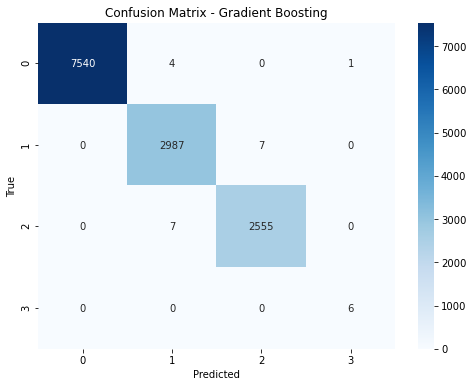

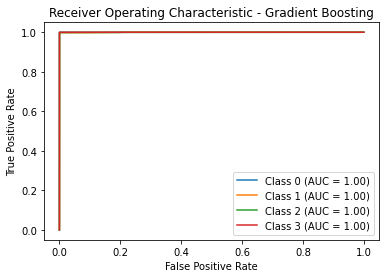

Gradient Boosting Accuracy: 0.9985503929198138
Gradient Boosting Confusion Matrix:
[[7540    4    0    1]
 [   0 2987    7    0]
 [   0    7 2555    0]
 [   0    0    0    6]]
Gradient Boosting Average ROC AUC: 0.999486147411321


In [13]:
from sklearn.preprocessing import label_binarize

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)

import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

gb_probabilities = gb_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]
gb_fpr = dict()
gb_tpr = dict()
gb_roc_auc = dict()
for i in range(n_classes):
    gb_fpr[i], gb_tpr[i], _ = roc_curve(y_test_bin[:, i], gb_probabilities[:, i])
    gb_roc_auc[i] = roc_auc_score(y_test_bin[:, i], gb_probabilities[:, i])

# Compute average ROC AUC
gb_roc_auc_avg = np.mean(list(gb_roc_auc.values()))

# Plot the ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(gb_fpr[i], gb_tpr[i], label='Class %d (AUC = %0.2f)' % (i, gb_roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Confusion Matrix:")
print(gb_confusion_matrix)
print("Gradient Boosting Average ROC AUC:", gb_roc_auc_avg)


C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


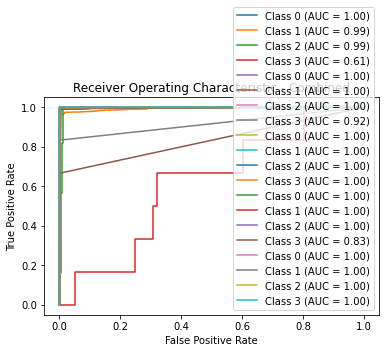

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Load the dataset
dataset_path = r"C:\Users\91832\Downloads\internet firewall.csv"
data = pd.read_csv(dataset_path)
# Separate features (X) and labels (y)
X = data.drop('Action', axis=1)
y = data['Action']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_probabilities = lr_model.predict_proba(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_probabilities = dt_model.predict_proba(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_probabilities = rf_model.predict_proba(X_test)

# k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_probabilities = knn_model.predict_proba(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_probabilities = gb_model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curves and AUCs
fpr = dict()
tpr = dict()
roc_auc = dict()

# Logistic Regression
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], lr_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], lr_probabilities[:, i])

# Decision Tree
for i in range(n_classes):
    fpr[i + n_classes], tpr[i + n_classes], _ = roc_curve(y_test_bin[:, i], dt_probabilities[:, i])
    roc_auc[i + n_classes] = roc_auc_score(y_test_bin[:, i], dt_probabilities[:, i])

# Random Forest
for i in range(n_classes):
    fpr[i + 2 * n_classes], tpr[i + 2 * n_classes], _ = roc_curve(y_test_bin[:, i], rf_probabilities[:, i])
    roc_auc[i + 2 * n_classes] = roc_auc_score(y_test_bin[:, i], rf_probabilities[:, i])

# KNN
for i in range(n_classes):
    fpr[i + 3 * n_classes], tpr[i + 3 * n_classes], _ = roc_curve(y_test_bin[:, i], knn_probabilities[:, i])
    roc_auc[i + 3 * n_classes] = roc_auc_score(y_test_bin[:, i], knn_probabilities[:, i])

# Gradient Boosting
for i in range(n_classes):
    fpr[i + 4 * n_classes], tpr[i + 4 * n_classes], _ = roc_curve(y_test_bin[:, i], gb_probabilities[:, i])
    roc_auc[i + 4 * n_classes] = roc_auc_score(y_test_bin[:, i], gb_probabilities[:, i])

# Plot the combined ROC curve
plt.figure()
for i in range(n_classes * 5):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i % n_classes, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Combined')
plt.legend(loc='lower right')
plt.show()
